Load basic libraries below

In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
import re

CWD = os.getcwd() 
CW_folder = (CWD + '/CW/' + 'resnet50/')
CW_files = os.listdir(CW_folder)


In [ ]:
# Code for deepfool or Carlini Wagner?
for i in range(1,80):
    filename = CW_files[i]
    
    try:
        # Read in the CSV file
        print (filename)
        data = genfromtxt(CW_folder + filename, delimiter=',', invalid_raise = False)
        print (data.shape)
        
        # Find the numbers in the filename
        numbers_in_filename = (re.findall(r'\d+', filename))
        print (numbers_in_filename)
        
        # Extract target and original class indices
        
        # target = int(numbers_in_filename[2]) original = int(numbers_in_filename[3]) for CW
        target = int(numbers_in_filename[2])
        original = int(numbers_in_filename[3])
        
        # target = int(numbers_in_filename[3]) original = int(numbers_in_filename[4]) for DeepFool
        
        # Plot everything
        plt.figure()
        plt.plot(data[:,target], 'r', label='Target probability')
        plt.plot(data[:,original], 'k', label='Original probability')
        plt.legend()
        plt.xlabel('Principal components')
        plt.ylabel('Probability of prediction')
        plt.title(filename)
    except:
        print ('nope')

In [ ]:
plt.plot(data[:,target], 'r', label='Target probability')
plt.plot(data[:,original], 'k', label='Original probability')
plt.legend()
plt.xlabel('Principal components')
plt.ylabel('Probability of prediction')
plt.title('Carlini Wagner attack on inception v3')

# FUNCTION TO GET (K,P) VALUES FROM FILES

In [ ]:
'''

Code below to extract the (k,p) values from a bunch of files. Very basic stuff. 

'''

import os
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
import re

def get_p_k_values(attack, model_name):
    K=0
    CWD = os.getcwd() 
    CW_folder = (CWD + '/' + attack + '/' + model_name + '/')
    CW_files = os.listdir(CW_folder)
    
    # CARLINI WAGNER EXTRACTION HERE
    k_values = []
    p_values = []
    for fn in range(0,len(CW_files)):
        filename = CW_files[fn]

        try:
            # Read in the CSV file
            print (fn, filename)
            data = genfromtxt(CW_folder + filename, delimiter=',', invalid_raise = False)
#             print (data.shape)

            # Find the numbers in the filename
            numbers_in_filename = (re.findall(r'\d+', filename))
            print (numbers_in_filename)

            # Extract target and original class indices
            # Extract target and original class indices
            if (attack == 'deepfool'):
                target = int(numbers_in_filename[3])
                original = int(numbers_in_filename[4])
            elif (attack == 'CW' or attack=='JSMA'):
                target = int(numbers_in_filename[2])
                original = int(numbers_in_filename[3])

            index = 0
            runner = 223
            topper_row = np.argmax(data[runner,:])
            
            while (topper_row == target):
                runner = runner - 1
                topper_row = np.argmax(data[runner,:])
            
            print ('k,p value: ', runner, data[runner, target])
            k_values.append(runner)
            p_values.append(data[runner, target])

            # Want to set up a while loop; start from last index, keep decrementing index till argmax is not target
            
#             if (attack == 'CW'):
#                 while(np.argmax(data[i, :]) == target and i > 0):
#                     p_value_target = data[i, :][target]
#                     p_value_original = data[i, :][original]
#                     i = i - 1
#                     index += 1
#                     k_value = i
# #                     print (target, original, p_value_target, p_value_original,np.argmax(data[i, :]), target)
                    
#             elif (attack=='deepfool' or attack=='JSMA'):
#                 while(np.argmax(data[i, :]) != target and i > 0):
#                     p_value_target = data[i, :][target]
#                     p_value_original = data[i, :][original]
#                     i = i - 1
#                     index += 1
#                     k_value = i
#                     print (target, original, p_value_target, p_value_original,np.argmax(data[i, :]), target)
#             k_values.append([k_value, p_value_original])

        except:
            K += 1

    print (k_values)
    print (p_values)

    return k_values, p_values

ks, ps = get_p_k_values('deepfool', 'resnet50')


plt.figure()
plt.scatter(ks, ps)


In [ ]:
CWD = os.getcwd() 
attack = 'deepfool'
model_name = 'vgg19'

CW_folder = (CWD + '/' + attack + '/' + model_name + '/')
CW_files = os.listdir(CW_folder)

i=0

# CARLINI WAGNER EXTRACTION HERE
k_values = []
for fn in range(0,5):
    filename = CW_files[fn]

    try:
        # Read in the CSV file
        print (fn, filename)
        data = genfromtxt(CW_folder + filename, delimiter=',', invalid_raise = False)
        print (data.shape)

        # Find the numbers in the filename
        numbers_in_filename = (re.findall(r'\d+', filename))
        print (numbers_in_filename)

        # Extract target and original class indices
        if (attack == 'deepfool'):
            target = int(numbers_in_filename[3])
            original = int(numbers_in_filename[4])
        elif (attack == 'CW'):
            target = int(numbers_in_filename[2])
            original = int(numbers_in_filename[3])
            
        print (target, original)

        # Find 
        index = 0
        i = 223

        # Want to set up a while loop; start from last index, keep decrementing index till argmax is not target
        while(np.argmax(data[i, :]) != target and i > 0):
            p_value_target = data[i, :][target]
            p_value_original = data[i, :][original]
            i = i - 1
            index += 1
            k_value = i
        k_values.append([k_value, p_value_original])

    except:
        i += 1

print (k_values)
p_vals = []
k_vals = []
for k_value in k_values:
    p_vals.append(k_value[1])
    k_vals.append(k_value[0])



# FUNCTION TO GET (K,P) VALUES FROM BENIGN SAMPLES

In [ ]:
def get_p_k_values_benign(attack, model_name):

    CWD = os.getcwd() 
    i = 0
    CW_folder = (CWD + '/' + attack + '/' + model_name + '/')
    CW_files = os.listdir(CW_folder)
#     print (CW_files)



    # CARLINI WAGNER EXTRACTION HERE
    k_values = []
    p_values = []

    print (len(CW_files))
    
    for fn in range(len(CW_files)):
        filename = CW_files[fn]

        try:
            
            # Quit to next one if not CSV file
            if ('.csv' not in filename):
                continue
            
            # Read in the CSV file
            print (fn, filename)
            data = genfromtxt(CW_folder + filename, delimiter=',', invalid_raise = False)

            # Find the numbers in the filename
            numbers_in_filename = (re.findall(r'\d+', filename))
            print ('Numbers in filename: ', numbers_in_filename)

            # Extract target and original class indices
            target = int(numbers_in_filename[3])
            top_prediction = int(numbers_in_filename[4])
            
#             # Skip misclassified predictions?
            if (target != top_prediction):
                continue
            
    #         print ('Target & original: ', target, original)

            # Find 
            index = 0
            runner = 223
            topper_row = np.argmax(data[runner,:])
            
            while (topper_row == target):
                runner = runner - 1
                topper_row = np.argmax(data[runner,:])
            
            print ('k,p value: ', runner, data[runner, target])
            
            k_values.append(runner)
            p_values.append(data[runner, target])
            

#             # Want to set up a while loop; start from last index, keep decrementing index till argmax is not target
#     #         print (np.argmax(data[i, :]), original, np.argmax(data[i, :]) == original)
#             while(np.argmax(data[i, :]) == original and i >= 0):
#     #             print ('I HEERE: ', i, index, k_value, p_value_original)
#                 p_value_target = data[i, :][target]
#                 p_value_original = data[i, :][original]
#                 i = i - 1
#                 index += 1
#                 k_value = i
# #             print ('wtf', k_value, p_value_original)
#             k_values.append([k_value, p_value_original])

        except:
            i += 1

    print (k_values)
    print (p_values)
    return k_values, p_values

benign_resnet_k, benign_resnet_p = get_p_k_values_benign('benign', 'vgg19')

print (len(benign_resnet_k), len(benign_resnet_p))

plt.figure()
plt.scatter(benign_resnet_k, benign_resnet_p)

# 77, 77

In [ ]:
len(benign_resnet_k)

# GET ACTUAL BENIGN COMPONENTS

In [ ]:
benign_resnet_k, benign_resnet_p = get_p_k_values_benign('benign', 'resnet50')
benign_inception_k, benign_inception_p = get_p_k_values_benign('benign', 'inception')
benign_vgg19_k, benign_vgg19_p = get_p_k_values_benign('benign', 'vgg19')

# GET ACTUAL ADVERSARIAL COMPONENTS

In [ ]:
CW_resnet_k, CW_resnet_p = get_p_k_values('CW', 'resnet50')
CW_inception_k, CW_inception_p = get_p_k_values('CW', 'inception')
CW_vgg19_k, CW_vgg19_p = get_p_k_values('CW', 'vgg19')

deepfool_resnet_k, deepfool_resnet_p = get_p_k_values('deepfool', 'resnet50')
deepfool_inception_k, deepfool_inception_p = get_p_k_values('deepfool', 'inception')
deepfool_vgg19_k, deepfool_vgg19_p = get_p_k_values('deepfool', 'vgg19')

JSMA_resnet_k, JSMA_resnet_p = get_p_k_values('JSMA', 'resnet50')
JSMA_inception_k, JSMA_inception_p = get_p_k_values('JSMA', 'inception')
JSMA_vgg19_k, JSMA_vgg19_p = get_p_k_values('JSMA', 'vgg19')


In [ ]:

print ('benign resnet: ', len(benign_resnet_k), 'benign inception: ', len(benign_inception_k), 'benign VGG19', len(benign_vgg19_k))
print ('CW resnet: ', len(CW_resnet_k), 'CW inception: ', len(CW_inception_k), 'CW VGG19', len(CW_vgg19_k))
print ('DEEPFOOL resnet: ', len(deepfool_resnet_k), 'DEEPFOOL inception: ', len(deepfool_inception_k), 'DEEPFOOL VGG19', len(deepfool_vgg19_k))
print ('jsma resnet: ', len(JSMA_resnet_k), 'jsma inception: ', len(JSMA_inception_k), 'jsma VGG19', len(JSMA_vgg19_k))



# PLOT JSMA ADVERSARIAL COMPONENTS BY ARCHITECTURE

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# PLOT JSMA STUFF
plt.figure()
plt.scatter(JSMA_resnet_k, JSMA_resnet_p, label='ResNet50')
plt.scatter(JSMA_inception_k, JSMA_inception_p, label='Inception-v3')
plt.scatter(JSMA_vgg19_k, JSMA_vgg19_p, label='VGG19')
plt.legend()
plt.title('JSMA adversarial attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
# plt.savefig('adversarial_retraining/plots/JSMA_attack_different_architectures.png', bbox_inches='tight')

# PLOT DEEPFOOL ADVERSARIAL COMPONENTS BY ARCHITECTURE

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# PLOT CARLINI WAGNER STUFF
plt.figure()
plt.scatter(deepfool_resnet_k, deepfool_resnet_p, label='ResNet50')
plt.scatter(deepfool_inception_k, deepfool_inception_p, label='Inception-v3')
plt.scatter(deepfool_vgg19_k, deepfool_vgg19_p, label='VGG19')
plt.legend()
plt.title('DeepFool adversarial attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
# plt.savefig('adversarial_retraining/plots/DeepFool_attack_different_architectures.png', bbox_inches='tight')

# PLOT CARLINI WAGNER ADVERSARIAL COMPONENTS BY ARCHITECTURE

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# PLOT CARLINI WAGNER STUFF
plt.figure()
plt.scatter(CW_resnet_k, CW_resnet_p, label='ResNet50')
plt.scatter(CW_inception_k, CW_inception_p, label='Inception-v3')
plt.scatter(CW_vgg19_k, CW_vgg19_p, label='VGG19')
plt.legend()
plt.title('Carlini Wagner adversarial attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
# plt.savefig('adversarial_retraining/plots/CW_attack_different_architectures.png', bbox_inches='tight')

# PLOT BENIGN COMPONENTS BY ARCHITECTURE

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# PLOT CARLINI WAGNER STUFF
plt.figure()
plt.scatter(benign_resnet_k, benign_resnet_p, label='ResNet50')
plt.scatter(benign_inception_k, benign_inception_p, label='Inception-v3')
plt.scatter(benign_vgg19_k, benign_vgg19_p, label='VGG19')
plt.legend()
plt.title('Benign samples for different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.savefig('adversarial_retraining/plots/benign_samples_imagenet_different_architectures.png', bbox_inches='tight')

# PLOT BENIGN AND ADVERSARIAL (K,P) COMPONENTS FOR CARLINI WAGNER ATTACK FOR ALL ARCHITECTURES

In [ ]:
# PLOT BENIGN STUFF HERE
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure()
plt.scatter(benign_resnet_k, benign_resnet_p, label='benign',c='k')
plt.scatter(benign_inception_k, benign_inception_p,c='k')
plt.scatter(benign_vgg19_k, benign_vgg19_p,c='k')

plt.scatter(CW_resnet_k, CW_resnet_p, label='adversarial',c='r')
plt.scatter(CW_inception_k, CW_inception_p,c='r')
plt.scatter(CW_vgg19_k, CW_vgg19_p,c='r')
plt.legend()
plt.title('CW attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.savefig('adversarial_retraining/plots/CW_benign_ImageNet_attack_different_architectures.png', bbox_inches='tight')


# COMPARE BENIGN AND ADVERSARIAL (K,P) COMPONENTS FOR CARLINI WAGNER FOR INCEPTION-V3, RESNET AND VGG19

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# INCEPTION BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(CW_inception_k, CW_inception_p, label='Adversarial (k,p) values')
plt.scatter(benign_inception_k, benign_inception_p, label='Benign (k,p) values')
plt.title('Carlini Wagner attacks on Inception-v3')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/CW_attack_ImageNet_inception.png', bbox_inches='tight')

# RESNET50 BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(CW_resnet_k, CW_resnet_p, label='Adversarial (k,p) values')
plt.scatter(benign_resnet_k, benign_resnet_p, label='Benign (k,p) values')
plt.title('Carlini Wagner attacks on ResNet50')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/CW_attack_ImageNet_resnet.png', bbox_inches='tight')

# VGG19 BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(CW_vgg19_k, CW_vgg19_p, label='Adversarial (k,p) values')
plt.scatter(benign_vgg19_k, benign_vgg19_p, label='Benign (k,p) values')
plt.title('Carlini Wagner attacks on VGG19')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/CW_attack_ImageNet_vgg19.png', bbox_inches='tight')


# PLOT BENIGN AND ADVERSARIAL (K,P) COMPONENTS FOR DEEPFOOL ATTACK FOR ALL ARCHITECTURES

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# PLOT DEEPFOOL STUFF
plt.figure()
plt.scatter(deepfool_resnet_k, deepfool_resnet_p, color='r')
plt.scatter(deepfool_inception_k, deepfool_inception_p, color='r')
plt.scatter(deepfool_vgg19_k, deepfool_vgg19_p, color='r', label='Adversarial ')
plt.title('DeepFool attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')

# PLOT BENIGN STUFF HERE
plt.scatter(benign_resnet_k, benign_resnet_p, color='k')
plt.scatter(benign_inception_k, benign_inception_p, color='k')
plt.scatter(benign_vgg19_k, benign_vgg19_p, color='k', label='Benign ')
plt.legend()
# plt.savefig('adversarial_retraining/plots/Deepfool_attack_ImageNet_all_architectures.png', bbox_inches='tight')


# COMPARE BENIGN AND ADVERSARIAL (K,P) COMPONENTS FOR DEEPFOOL FOR INCEPTION-V3, RESNET AND VGG19

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# INCEPTION BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(deepfool_inception_k, deepfool_inception_p, label='Adversarial (k,p) values')
plt.scatter(benign_inception_k, benign_inception_p, label='Benign (k,p) values')
plt.title('Deepfool attacks on Inception-v3')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/Deepfool_attack_ImageNet_inception.png', bbox_inches='tight')


# RESNET50 BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(deepfool_resnet_k, deepfool_resnet_p, label='Adversarial (k,p) values')
plt.scatter(benign_resnet_k, benign_resnet_p, label='Benign (k,p) values')
plt.title('DeepFool attacks on ResNet50')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/Deepfool_attack_ImageNet_inception.png', bbox_inches='tight')


# VGG19 BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(deepfool_vgg19_k, deepfool_vgg19_p, label='Adversarial (k,p) values')
plt.scatter(benign_vgg19_k, benign_vgg19_p, label='Benign (k,p) values')
plt.title('DeepFool attacks on VGG19')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/Deepfool_attack_ImageNet_inception.png', bbox_inches='tight')


# PLOT BENIGN AND ADVERSARIAL (K,P) COMPONENTS FOR JSMA ATTACK FOR ALL ARCHITECTURES

In [ ]:
# PLOT BENIGN STUFF HERE
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure()
plt.scatter(benign_resnet_k, benign_resnet_p, label='benign',c='k')
plt.scatter(benign_inception_k, benign_inception_p,c='k')
plt.scatter(benign_vgg19_k, benign_vgg19_p,c='k')

plt.scatter(JSMA_resnet_k, JSMA_resnet_p, label='adversarial',c='r')
plt.scatter(JSMA_inception_k, JSMA_inception_p,c='r')
plt.scatter(JSMA_vgg19_k, JSMA_vgg19_p,c='r')
plt.legend()
plt.title('JSMA adversarial attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.savefig('adversarial_retraining/plots/jsma_attack_ImageNet_all_architectures.png', bbox_inches='tight')


# COMPARE BENIGN AND ADVERSARIAL (K,P) COMPONENTS FOR JSMA FOR INCEPTION-V3, RESNET AND VGG19

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# INCEPTION BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(JSMA_inception_k, JSMA_inception_p, label='Adversarial (k,p) values')
plt.scatter(benign_inception_k, benign_inception_p, label='Benign (k,p) values')
plt.title('JSMA attacks on Inception-v3')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/jsma_attack_ImageNet_inception.png', bbox_inches='tight')

# RESNET50 BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(JSMA_resnet_k, JSMA_resnet_p, label='Adversarial (k,p) values')
plt.scatter(benign_resnet_k, benign_resnet_p, label='Benign (k,p) values')
plt.title('JSMA attacks on ResNet50')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/jsma_attack_ImageNet_resnet.png', bbox_inches='tight')

# VGG19 BENIGN VS ADVERSARIAL
plt.figure()
plt.scatter(JSMA_vgg19_k, JSMA_vgg19_p, label='Adversarial (k,p) values')
plt.scatter(benign_vgg19_k, benign_vgg19_p, label='Benign (k,p) values')
plt.title('JSMA attacks on VGG19')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.legend()
# plt.savefig('adversarial_retraining/plots/jsma_attack_ImageNet_vgg.png', bbox_inches='tight')


# PUT THEM ALL IN ONE BIG UGLY PLOT

In [ ]:
# PLOT BENIGN STUFF HERE
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure()
plt.scatter(benign_resnet_k, benign_resnet_p, label='benign',c='k')
plt.scatter(benign_inception_k, benign_inception_p,c='k')
plt.scatter(benign_vgg19_k, benign_vgg19_p,c='k')

plt.scatter(JSMA_resnet_k, JSMA_resnet_p, label='adversarial',c='r')
plt.scatter(JSMA_inception_k, JSMA_inception_p,c='r')
plt.scatter(JSMA_vgg19_k, JSMA_vgg19_p,c='r')

plt.scatter(CW_resnet_k, CW_resnet_p, c='r')
plt.scatter(CW_inception_k, CW_inception_p,c='r')
plt.scatter(CW_vgg19_k, CW_vgg19_p,c='r')

# plt.scatter(deepfool_resnet_k, deepfool_resnet_p,c='r')
# plt.scatter(deepfool_inception_k, deepfool_inception_p,c='r')
# plt.scatter(deepfool_vgg19_k, deepfool_vgg19_p,c='r')

plt.legend()
plt.title('All adversarial attacks on different architectures')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
# plt.savefig('adversarial_retraining/plots/all_attacks_ImageNet_all_architectures.png', bbox_inches='tight')


# PLOT DIFFERENT ADVERSARIAL SAMPLES FOR FIXED ARCHITECTURES. INCEPTION FIRST

In [ ]:
# PLOT BENIGN STUFF HERE
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure()
# plt.scatter(benign_resnet_k, benign_resnet_p, label='benign',c='k')
plt.scatter(benign_inception_k, benign_inception_p,c='k', label='Benign')
# plt.scatter(benign_vgg19_k, benign_vgg19_p,c='k')

plt.scatter(JSMA_inception_k, JSMA_inception_p, label='JSMA')
plt.scatter(CW_inception_k, CW_inception_p, label='Carlini-Wagner')
plt.scatter(deepfool_inception_k, deepfool_inception_p, label='DeepFool')
plt.legend()
plt.title('Different adversarial attacks on Inception-v3 architecture')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.savefig('adversarial_retraining/plots/all_attacks_ImageNet_inception.png', bbox_inches='tight')


# PLOT DIFFERENT ADVERSARIAL SAMPLES FOR FIXED ARCHITECTURES. RESNET SECOND.

In [ ]:
# PLOT BENIGN STUFF HERE
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure()
plt.scatter(benign_resnet_k, benign_resnet_p, label='benign',c='k')
# plt.scatter(benign_inception_k, benign_inception_p,c='k')
# plt.scatter(benign_vgg19_k, benign_vgg19_p,c='k')

plt.scatter(JSMA_resnet_k, JSMA_resnet_p, label='JSMA')
plt.scatter(CW_resnet_k, CW_resnet_p, label='Carlini Wagner')
plt.scatter(deepfool_resnet_k, deepfool_resnet_p, label='DeepFool')
plt.legend()
plt.title('Different adversarial attacks on ResNet50 architecture')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.savefig('adversarial_retraining/plots/all_attacks_ImageNet_resnet.png', bbox_inches='tight')


# PLOT DIFFERENT ADVERSARIAL SAMPLES FOR FIXED ARCHITECTURES. VGG19 BELOW.

In [ ]:
# PLOT BENIGN STUFF HERE
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure()
# plt.scatter(benign_resnet_k, benign_resnet_p, label='benign',c='k')
# plt.scatter(benign_inception_k, benign_inception_p,c='k')
plt.scatter(benign_vgg19_k, benign_vgg19_p,c='k',label='Benign')

plt.scatter(JSMA_vgg19_k, JSMA_vgg19_p, label='JSMA')
plt.scatter(CW_vgg19_k, CW_vgg19_p, label='Carlini-Wagner')
plt.scatter(deepfool_vgg19_k, deepfool_vgg19_p, label='DeepFool')
plt.legend()
plt.title('Different adversarial attacks on VGG19 architecture')
plt.xlabel('Component Number (k)')
plt.ylabel('Softmax Probability (p)')
plt.savefig('adversarial_retraining/plots/all_attacks_ImageNet_vgg19.png', bbox_inches='tight')


# TEST MODEL AGNOSTICITY OF THE K,P VALUES

In [ ]:
from random import shuffle

# Prediction
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
import sklearn

# Each of these is a 100 element list. We need to concatenate them horizontally into a 200x2 array, with a 0 for benign and 1 for adversarial
benign_resnet_k, benign_resnet_p
CW_resnet_k, CW_resnet_p

# class = 0
benign_resnet_k_np = np.array(benign_resnet_k[:])
benign_resnet_p_np = np.array(benign_resnet_p[:])
class_benign = np.zeros(len(benign_resnet_p))
benign_everything = np.stack((benign_resnet_k_np, benign_resnet_p_np, class_benign), axis=-1)

CW_resnet_k_np = np.array(CW_resnet_k[:])
CW_resnet_p_np = np.array(CW_resnet_p[:])
class_advers = np.ones(len(CW_resnet_k_np))
adversarial_everything = np.stack((CW_resnet_k_np, CW_resnet_p_np, class_advers), axis=-1)

full_dataset = np.vstack((benign_everything, adversarial_everything))
np.random.shuffle(full_dataset)

x_train = full_dataset[0:100, 0:2]
y_train = full_dataset[0:100, 2]
x_test = full_dataset[100:-1, 0:2]
y_test = full_dataset[100:-1, 2]

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(x_train, y_train)

Z = bdt.predict(x_test)

print (1.0 * np.sum(Z==y_test) / len(Z))

X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

print (sklearn.metrics.classification_report(y_test, Z))

plot_colors = "br"
plot_step = 0.02
class_names = "AB"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

plt.figure(figsize=(10, 5))
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

In [ ]:
'''
predict_results(benign_k, benign_p, adv_k, adv_p, model_type, split_ratio)
inputs: benign and adversarial k,p components, split ratio
outputs: figure containing everything we need
'''
def predict_results(benign_k, benign_p, adv_k, adv_p, split_ratio):
    # Prediction
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.datasets import make_gaussian_quantiles
    from random import shuffle
    import sklearn

    # Make the model
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                     algorithm="SAMME",
                     n_estimators=200)

    # Make data - first benign data. Class 0 corresponds to benign data.
    benign_k_np = np.array(benign_k[:])
    benign_p_np = np.array(benign_p[:])
    class_benign = np.zeros(len(benign_p_np))
    benign_everything = np.stack((benign_k_np, benign_p_np, class_benign), axis=-1)

    # Make data - now adversarial data. Class 1 corresponds to adversarial data.
    adv_k_np = np.array(adv_k[:])
    adv_p_np = np.array(adv_p[:])
    class_advers = np.ones(len(adv_p_np))
    adversarial_everything = np.stack((adv_k_np, adv_p_np, class_advers), axis=-1)
    
    # Stack and shuffle
    full_dataset = np.vstack((benign_everything, adversarial_everything))
    np.random.shuffle(full_dataset)
    
    # Split data into train and test
    x_train = full_dataset[0:int(split_ratio * len(full_dataset)), 0:2]
    y_train = full_dataset[0:int(split_ratio * len(full_dataset)), 2]
    x_test = full_dataset[int(split_ratio * len(full_dataset)):-1, 0:2]
    y_test = full_dataset[int(split_ratio * len(full_dataset)):-1, 2]
    
    # Train and predict our model now
    bdt.fit(x_train, y_train)
    predictions = bdt.predict(x_test)
    
    # Print out the test accuracy
    print (1.0 * np.sum(predictions==y_test) / len(predictions))
    
    # Plot all of the stuff out
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))

    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    figure_plot = plt.figure(figsize=(10, 5))
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, cmap=plt.cm.Paired,
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    
    print (sklearn.metrics.classification_report(y_test, predictions))
    
    return (sklearn.metrics.classification_report(y_test, predictions), figure_plot)


'''
predict_results(benign_k, benign_p, adv_k, adv_p, model_type, split_ratio)
inputs: benign and adversarial k,p components, split ratio
outputs: figure containing everything we need
Half of the benign set must be in the training set, and half of the benign set must be in the test set.
'''
def predict_results_cross_models(benign_k, benign_p, adv_k_train, adv_p_train, adv_k_test, adv_p_test, split):
    # Prediction
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.datasets import make_gaussian_quantiles
    from random import shuffle
    import sklearn

    # Make the model
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                     algorithm="SAMME",
                     n_estimators=200)

    # Make data - first benign data. Class 0 corresponds to benign data.
    benign_k_np = np.array(benign_k[:])
    benign_p_np = np.array(benign_p[:])
    class_benign = np.zeros(len(benign_p_np))
    benign_everything = np.stack((benign_k_np, benign_p_np, class_benign), axis=-1)
    
    # We want to split the benign into training and testing data
    benign_train = benign_everything[0:int(split * len(benign_k)), :]
    benign_test = benign_everything[int(split * len(benign_k)):-1, :]

    # Make data - now adversarial data. Class 1 corresponds to adversarial data.
    adv_k_np = np.array(adv_k_train[:])
    adv_p_np = np.array(adv_p_train[:])
    class_advers = np.ones(len(adv_p_np))
    adversarial_everything = np.stack((adv_k_np, adv_p_np, class_advers), axis=-1)
    
    # We want to split adversarial source into a smaller set, same size as benign
    adversarial_train = adversarial_everything[0:int(split * len(benign_k)), :]
    
    # Make data - now adversarial test data
    adv_k_np_test = np.array(adv_k_test[:])
    adv_p_np_test = np.array(adv_p_test[:])
    class_advers = np.ones(len(adv_p_np_test))
    adversarial_test_all = np.stack((adv_k_np_test, adv_p_np_test, class_advers), axis=-1)
    adversarial_test = adversarial_test_all[0:int(split * len(benign_k)), :]
    
    # Stack and shuffle
    train_dataset = np.vstack((benign_train, adversarial_train))
    test_dataset = np.vstack((benign_test, adversarial_test))
    
    print ('Train dataset shape: ', train_dataset.shape)
    print ('Test dataset shape: ', test_dataset.shape)
    print ('Benign training set shape: ', benign_train.shape)
    print ('Benign test set shape: ', benign_test.shape)
    print ('Adversarial training set shape: ', adversarial_train.shape)
    print ('Adversarial test set shape: ', adversarial_test.shape)
    
    
    np.random.shuffle(train_dataset)
    np.random.shuffle(test_dataset)
    
    # Split data into xtrain, ytrain, xtest, ytest
    x_train = train_dataset[:, 0:2]
    y_train = train_dataset[:, 2]
    x_test = test_dataset[:, 0:2]
    y_test = test_dataset[:, 2]
    
    # Train and predict our model now
    bdt.fit(x_train, y_train)
    predictions = bdt.predict(x_test)
    
    # Print out the test accuracy
    print (1.0 * np.sum(predictions==y_test) / len(predictions))
    
    # Plot all of the stuff out
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))

    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    figure_plot = plt.figure(figsize=(10, 5))
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, cmap=plt.cm.Paired,
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    
    print (sklearn.metrics.classification_report(y_test, predictions))
    
    return (sklearn.metrics.classification_report(y_test, predictions), figure_plot)

In [ ]:
len(benign_resnet_k), len(benign_inception_k), len(benign_vgg19_k)


# a,b = predict_results(benign_resnet_k, benign_resnet_p, CW_resnet_k, CW_resnet_p, split_ratio=0.5)

print 'Benign model: ResNet50'
print 'Source model, attack: CW, resnet'
a,b = predict_results_cross_models(benign_inception_k, benign_inception_p, CW_inception_k, CW_inception_p, 
                                   deepfool_inception_k, deepfool_inception_p, split=0.5)



In [ ]:
# benign_resnet_k, benign_resnet_p = get_p_k_values_benign('benign', 'resnet50')
# benign_inception_k, benign_inception_p = get_p_k_values_benign('benign', 'inception')
# benign_vgg19_k, benign_vgg19_p = get_p_k_values_benign('benign', 'vgg19')

# CW_resnet_k, CW_resnet_p = get_p_k_values('CW', 'resnet50')
# CW_inception_k, CW_inception_p = get_p_k_values('CW', 'inception')
# CW_vgg19_k, CW_vgg19_p = get_p_k_values('CW', 'vgg19')

# deepfool_resnet_k, deepfool_resnet_p = get_p_k_values('deepfool', 'resnet50')
# deepfool_inception_k, deepfool_inception_p = get_p_k_values('deepfool', 'inception')
# deepfool_vgg19_k, deepfool_vgg19_p = get_p_k_values('deepfool', 'vgg19')

# JSMA_resnet_k, JSMA_resnet_p = get_p_k_values('JSMA', 'resnet50')
# JSMA_inception_k, JSMA_inception_p = get_p_k_values('JSMA', 'inception')
# JSMA_vgg19_k, JSMA_vgg19_p = get_p_k_values('JSMA', 'vgg19')

dict_vals = {('inception', 'CW'):(CW_inception_k, CW_inception_p),
             ('resnet', 'CW'):(CW_resnet_k, CW_resnet_p),
             ('vgg19', 'CW'):(CW_vgg19_k, CW_vgg19_p),
             ('inception', 'deepfool'):(deepfool_inception_k, deepfool_inception_p),
             ('resnet', 'deepfool'):(deepfool_resnet_k, deepfool_resnet_p),
             ('vgg19', 'deepfool'):(deepfool_vgg19_k, deepfool_vgg19_p),
             ('inception', 'JSMA'):(JSMA_inception_k, JSMA_inception_p),
             ('resnet', 'JSMA'):(JSMA_resnet_k, JSMA_resnet_p),
             ('vgg19', 'JSMA'):(JSMA_vgg19_k, JSMA_vgg19_p),
             ('inception', 'benign'):(benign_inception_k, benign_inception_p),
             ('resnet', 'benign'):(benign_resnet_k, benign_resnet_p),
             ('vgg19', 'benign'):(benign_vgg19_k, benign_vgg19_p)
            }


len(dict_vals[('inception', 'benign')][0])

In [ ]:
# Inception evaluated on Inception
SPLIT_RATIO = 0.5

attack_types = ['CW', 'deepfool', 'JSMA']
model_types = ['inception', 'resnet', 'vgg19']

attack_model_pairs = []

for model_type in model_types:
    for attack_type in attack_types:
        attack_model_pairs.append([model_type, attack_type])
i = 0

# Go through the training stuff
for attack_model_pair_train in attack_model_pairs:
    model_train = attack_model_pair_train[0]
    attack_train = attack_model_pair_train[1]
    
    benign_vals = dict_vals[(model_train, 'benign')]
    benign_k = benign_vals[0]
    benign_p = benign_vals[1]
    
    print (len(benign_k), len(benign_p))
    
    train_vals = dict_vals[(model_train, attack_train)]
    train_k = train_vals[0]
    train_p = train_vals[1]
    
    # Go through the attack model pairs -  we want to evaluate on these
    for attack_model_pair_evaluated in attack_model_pairs:
        model_evaluated = attack_model_pair_evaluated[0]
        attack_evaluated = attack_model_pair_evaluated[1]
        print 'Trained on: ', (model_train,attack_train), 'Evaluated on :', (model_evaluated, attack_evaluated)
        
        # Load the test results
        test_vals = dict_vals[(model_evaluated,attack_evaluated)]
        test_k = test_vals[0]
        test_p = test_vals[1]
        
        a,b = predict_results_cross_models(benign_k, benign_p, train_k, train_p, 
                                   test_k, test_p, split=0.5)
        
        i+=1
        print ('\n\n\n')
    print (i, '\n\n')
    
# # Inception evaluated on inception
# a,b = predict_results(benign_inception_k, benign_inception_p, CW_inception_k, CW_inception_p, split_ratio=SPLIT_RATIO)
# a,b = predict_results(benign_inception_k, benign_inception_p, deepfool_inception_k, deepfool_inception_p, split_ratio=SPLIT_RATIO)
# a,b = predict_results(benign_inception_k, benign_inception_p, JSMA_resnet_k, JSMA_resnet_p, split_ratio=SPLIT_RATIO)

# # Resnet evaluated on resnet
# a,b = predict_results(benign_resnet_k, benign_resnet_p, CW_resnet_k, CW_resnet_p, split_ratio=SPLIT_RATIO)
# a,b = predict_results(benign_resnet_k, benign_resnet_p, deepfool_resnet_k, deepfool_resnet_p, split_ratio=SPLIT_RATIO)
# a,b = predict_results(benign_resnet_k, benign_resnet_p, JSMA_resnet_k, JSMA_resnet_p, split_ratio=SPLIT_RATIO)

# # VGG evaluated on VGG
# a,b = predict_results(benign_vgg19_k, benign_vgg19_p, deepfool_vgg19_k, deepfool_vgg19_p, split_ratio=SPLIT_RATIO)
# a,b = predict_results(benign_vgg19_k, benign_vgg19_p, deepfool_vgg19_k, deepfool_vgg19_p, split_ratio=SPLIT_RATIO)
# a,b = predict_results(benign_vgg19_k, benign_vgg19_p, JSMA_vgg19_k, JSMA_vgg19_p, split_ratio=SPLIT_RATIO)


In [ ]:
# itertools for cartesian product! Would be super helpful in going over data structures
a,b = predict_results_cross_models(benign_resnet_k, benign_resnet_p, CW_inception_k, CW_inception_p, 
                                   deepfool_inception_k, deepfool_inception_p, split=0.5)



In [ ]:
a = [[1.00, 1.00, 1.00, 0.97, 0.94, 0.99, 0.97, 1.00, 0.99],
[0.85, 1.00, 0.97, 0.96, 0.94, 0.93, 0.91, 1.00, 0.90],
[0.90, 1.00, 1.00, 0.96, 0.94, 0.94, 0.91, 1.00, 0.93],
[0.97, 0.69, 0.99, 1.00, 0.65, 0.95, 0.96, 0.65, 0.95],
[0.70, 0.93, 0.84, 0.88, 0.93, 0.85, 0.77, 0.93, 0.77],
[0.89, 0.97, 0.96, 0.97, 0.93, 0.97, 0.91, 0.97, 0.93],
[0.99, 1.00, 1.00, 0.97, 0.96, 0.97, 1.00, 1.00, 0.96],
[0.76, 1.00, 0.90, 0.95, 0.95, 0.84, 1.00, 0.85, 0.97],
[0.99, 0.99, 0.95, 0.94, 0.96, 0.97, 0.99, 0.99, 0.99]]

data = np.array(a)

In [ ]:
import seaborn as sns; sns.set()

In [ ]:
benign_k = benign_resnet_k + benign_inception_k + benign_vgg19_k
benign_p = benign_resnet_p + benign_inception_p + benign_vgg19_p

adv_k = CW_resnet_k + CW_inception_k + CW_vgg19_k + deepfool_resnet_k + deepfool_inception_k + deepfool_vgg19_k + JSMA_resnet_k + JSMA_inception_k + JSMA_vgg19_k

adv_p = CW_resnet_p + CW_inception_p + CW_vgg19_p + deepfool_resnet_p + deepfool_inception_p + deepfool_vgg19_p + JSMA_resnet_p + JSMA_inception_p + JSMA_vgg19_p

from random import shuffle

# Prediction
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
import sklearn

# Each of these is a 100 element list. We need to concatenate them horizontally into a 200x2 array, with a 0 for benign and 1 for adversarial
benign_resnet_k, benign_resnet_p
CW_resnet_k, CW_resnet_p

# class = 0
benign_k_np = np.array(benign_k[:])
benign_p_np = np.array(benign_p[:])
class_benign = np.zeros(len(benign_p))
benign_everything = np.stack((benign_k_np, benign_p_np, class_benign), axis=-1)

adv_k_np = np.array(adv_k[:])
adv_p_np = np.array(adv_p[:])
class_advers = np.ones(len(adv_k_np))
adversarial_everything = np.stack((adv_k_np, adv_p_np, class_advers), axis=-1)

full_dataset = np.vstack((benign_everything, adversarial_everything))
np.random.shuffle(full_dataset)

x_train = full_dataset[0:100, 0:2]
y_train = full_dataset[0:100, 2]
x_test = full_dataset[100:-1, 0:2]
y_test = full_dataset[100:-1, 2]

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(x_train, y_train)

Z = bdt.predict(x_test)

print (1.0 * np.sum(Z==y_test) / len(Z))

X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

print (sklearn.metrics.classification_report(y_test, Z))

plot_colors = "br"
plot_step = 0.02
class_names = "AB"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

plt.figure(figsize=(10, 5))
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')


# MOHAMMAD'S IDEA: SEE HOW THE TEST ACCURACY (TOP-1 AND TOP-5) VARIES AS I ADJUST THE NUMBER OF COMPONENTS

In [20]:
# Import basic required libraries
import foolbox
import torch
import torchvision.models as models
import numpy as np
from foolbox.criteria import TargetClassProbability
from foolbox import criteria
import random 
import os    
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA as RandomizedPCA
import pickle
from skimage import io, transform
from PIL import Image
from functions import *
import pandas as pd
import csv
import requests

mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

path = '/home/malhar/Desktop/data/'

# Load in the models
model_type = models.inception_v3(pretrained=True).eval()
if torch.cuda.is_available():
    model_type = model_type.cuda()

LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

filenames = [line.rstrip('\n') for line in open('filenames.txt')]

idxs, classes, nlabels = get_classes(filenames)

DIMS = 400

classes_exp = classes[0:DIMS]

k_preds_top_1 = []
k_preds_top_5 = []
ratios = []

# Get the component
for k in range(0,225,5):
    
    top_1_correct_preds = 0
    top_5_correct_preds = 0
    count = 0
    mean_ratios = 0
    
    for index_filename in range(DIMS):
        
        # Read in the filename from all possible filenames
        filename = filenames[index_filename]
        
        # Read in image
        img = obtain_image_from_index(index_filename)
        
        if ((len(img.shape) < 3)):
            continue
        
        # Get class number
        class_number = classes[index_filename]
        
        # Get ground truth label
        ground_truth_label = labels[class_number]
        
        # Convert image to torch tensor
        img_torch = torch.from_numpy(img).cuda()
        torch_input = torch.zeros((1,3,224,224))
        torch_input[0,0,:,:] = img_torch[:,:,0]
        torch_input[0,1,:,:] = img_torch[:,:,1]
        torch_input[0,2,:,:] = img_torch[:,:,2]
        torch_input = torch_input[:].cuda()
        
        # Run predictions on original image
        predictions = model_type(torch_input)
        
        # Get top prediction
        top_prediction = int(torch.argmax(predictions).detach().cpu().numpy())
        top_5_predictions = predictions.detach().cpu().numpy().argsort()[0,-5:][::-1]
        
        # Print it out
#         print ('ORIGINAL IMAGE')
#         print (filename)
#         print ('Original: ', class_number, ground_truth_label)
#         print ('Predicted: ', top_prediction, labels[top_prediction])
        
        # PCA decomposition? Only test correctly predicted inputs
        if (count >= 200):
            break
        if (class_number == top_prediction):
            count += 1
            
            # Run PCA transformation
            PCA, ratio = PCA_transform(img, 224, k)
            mean_ratios += ratio
            
            pca_filename = 'test_images/' + str(k) + '_ground_truth_' + str(class_number) + '_pcapredictions_' + str(top_prediction)
            pca_filename += '_' + filename + '.png'
            
#             plt.imsave(pca_filename, PCA, format='png')
            
            # Perform a prediction on the PCA image
            img_torch_pca = torch.from_numpy(PCA).cuda()
            torch_input_pca = torch.zeros((1,3,224,224))
            torch_input_pca[0,0,:,:] = img_torch_pca[:,:,0]
            torch_input_pca[0,1,:,:] = img_torch_pca[:,:,1]
            torch_input_pca[0,2,:,:] = img_torch_pca[:,:,2]
            torch_input_pca = torch_input_pca[:].cuda()
            
            # Predict stuff on it now
            predictions_pca = model_type(torch_input_pca)
            
            # Get top prediction
            top_prediction_pca = int(torch.argmax(predictions_pca).detach().cpu().numpy())
            
#             print (k,'PCA Predicted: ', top_prediction_pca, labels[top_prediction_pca], 'Original: ', class_number, ground_truth_label)
            
            # Print it out
            if (top_prediction_pca == class_number):
#                 print ('ayyyy')
                top_1_correct_preds += 1
            
            if (top_prediction_pca in top_5_predictions):
                top_5_correct_preds += 1
             
    print ('---------------------------')
    print ('Component: ', k)
    print ('Component wise top-1 accuracy: ', top_1_correct_preds / (1.0 * count), top_1_correct_preds, count)
    print ('Component wise top-5 accuracy: ', top_5_correct_preds / (1.0 * count), top_5_correct_preds, count)
    print ('Mean ratio: ', mean_ratios/(1.0 * count))
    k_preds_top_1.append(top_1_correct_preds / (1.0 * count))
    k_preds_top_5.append(top_5_correct_preds / (1.0 * count))
    ratios.append(mean_ratios/(1.0 * count))
    

---------------------------
('Component: ', 0)
('Component wise top-1 accuracy: ', 0.0, 0, 200)
('Component wise top-5 accuracy: ', 0.005, 1, 200)
('Mean ratio: ', 0.0)
---------------------------
('Component: ', 5)
('Component wise top-1 accuracy: ', 0.03, 6, 200)
('Component wise top-5 accuracy: ', 0.045, 9, 200)
('Mean ratio: ', 0.7040014530718327)
---------------------------
('Component: ', 10)
('Component wise top-1 accuracy: ', 0.135, 27, 200)
('Component wise top-5 accuracy: ', 0.2, 40, 200)
('Mean ratio: ', 0.794137782305479)
---------------------------
('Component: ', 15)
('Component wise top-1 accuracy: ', 0.295, 59, 200)
('Component wise top-5 accuracy: ', 0.43, 86, 200)
('Mean ratio: ', 0.8377112109959125)
---------------------------
('Component: ', 20)
('Component wise top-1 accuracy: ', 0.45, 90, 200)
('Component wise top-5 accuracy: ', 0.61, 122, 200)
('Mean ratio: ', 0.8655209845304489)
---------------------------
('Component: ', 25)
('Component wise top-1 accuracy: ', 

---------------------------
('Component: ', 220)
('Component wise top-1 accuracy: ', 1.0, 200, 200)
('Component wise top-5 accuracy: ', 1.0, 200, 200)
('Mean ratio: ', 0.9999734142422676)


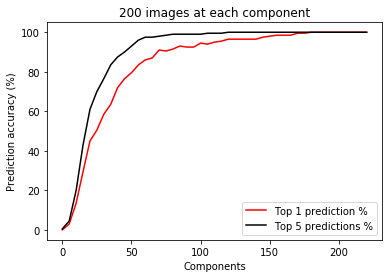

In [21]:
fig = plt.figure()

plt.plot(range(0,225,5), 100*np.array(k_preds_top_1), c='r', label='Top 1 prediction %')
plt.plot(range(0,225,5), 100*np.array(k_preds_top_5), c='k', label='Top 5 predictions %')
plt.legend()
plt.xlabel('Components')
plt.ylabel('Prediction accuracy (%)')
plt.title('200 images at each component')
plt.savefig('test_images/inception_plots_200_imgs_' + '.pdf', format='pdf')

# LET'S DO THIS NOW FOR NON-MISCLASSIFIED IMAGES ALSO

In [ ]:
import os
import numpy as np
import random 
import matplotlib.pyplot as plt
import matplotlib

path_cw = ''